Загрузите данные при помощи spark.read.csv из приложенного файла


In [1]:
!pip install pyspark

"pip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[1]").appName("Spark").getOrCreate()


In [37]:
from pyspark.sql.types import *

data_shema = [StructField("sepal_length",DoubleType(),True), StructField("sepal_width",DoubleType(),True), StructField("petal_length",DoubleType(),True), StructField("petal_width",DoubleType(),True), StructField("variety",StringType(),True)]
final_struc = StructType(fields = data_shema)
df = spark.read.csv("iris.csv",sep=',',header=True, schema=final_struc)
df.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

In [32]:
#Выведите 5 первых строк данных.
df.take(10)

[Row(sepal_length='5.1', sepal_width='3.5', petal_length='1.4', petal_width='.2', variety='Setosa'),
 Row(sepal_length='4.9', sepal_width='3', petal_length='1.4', petal_width='.2', variety='Setosa'),
 Row(sepal_length='4.7', sepal_width='3.2', petal_length='1.3', petal_width='.2', variety='Setosa'),
 Row(sepal_length='4.6', sepal_width='3.1', petal_length='1.5', petal_width='.2', variety='Setosa'),
 Row(sepal_length='5', sepal_width='3.6', petal_length='1.4', petal_width='.2', variety='Setosa'),
 Row(sepal_length='5.4', sepal_width='3.9', petal_length='1.7', petal_width='.4', variety='Setosa'),
 Row(sepal_length='4.6', sepal_width='3.4', petal_length='1.4', petal_width='.3', variety='Setosa'),
 Row(sepal_length='5', sepal_width='3.4', petal_length='1.5', petal_width='.2', variety='Setosa'),
 Row(sepal_length='4.4', sepal_width='2.9', petal_length='1.4', petal_width='.2', variety='Setosa'),
 Row(sepal_length='4.9', sepal_width='3.1', petal_length='1.5', petal_width='.1', variety='Setosa

In [39]:
#Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное
#минимальное и среднее значние каждого из аттрбутов цветка
#('sepal_length','sepal_width','petal_length','petal_width')
df_grp = df.groupby("variety")
df_grp.avg("sepal_length").show()
df_grp.min("sepal_length").show()
df_grp.max("sepal_length").show()
df_grp.avg("sepal_width").show()
df_grp.min("sepal_width").show()
df_grp.max("sepal_width").show()
df_grp.avg("petal_length").show()
df_grp.min("petal_length").show()
df_grp.max("petal_length").show()
df_grp.avg("petal_width").show()
df_grp.min("petal_width").show()
df_grp.max("petal_width").show()

+----------+-----------------+
|   variety|avg(sepal_length)|
+----------+-----------------+
| Virginica|6.587999999999998|
|    Setosa|5.005999999999999|
|Versicolor|            5.936|
+----------+-----------------+

+----------+-----------------+
|   variety|min(sepal_length)|
+----------+-----------------+
| Virginica|              4.9|
|    Setosa|              4.3|
|Versicolor|              4.9|
+----------+-----------------+

+----------+-----------------+
|   variety|max(sepal_length)|
+----------+-----------------+
| Virginica|              7.9|
|    Setosa|              5.8|
|Versicolor|              7.0|
+----------+-----------------+

+----------+------------------+
|   variety|  avg(sepal_width)|
+----------+------------------+
| Virginica|2.9739999999999998|
|    Setosa| 3.428000000000001|
|Versicolor|2.7700000000000005|
+----------+------------------+

+----------+----------------+
|   variety|min(sepal_width)|
+----------+----------------+
| Virginica|             2.2|
|

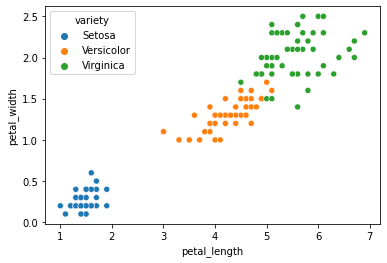

In [49]:
#Постройте точечную диаграмму для petal_length и petal_width, раскрашенный по типам
#цветков.
pd_df=df.toPandas()
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = pd_df, x = "petal_length", y = "petal_width", hue = "variety")
plt.show()


In [61]:
#Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ
#ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA -ИНАЧЕ К
#КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN).

df_filter=df.where((df["petal_length"]<2) & (df["petal_width"]<0.7))
df_filter.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

In [55]:
#При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с
# таким предсказанием.
from pyspark.sql.functions import when
df2 = df.withColumn("NewClmn", when((df['petal_length']<2) & (df["petal_width"]<0.7),"Iris-setosa").otherwise("UNKNOWN"))

df2.show()

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|    NewClmn|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|Iris-

In [70]:
#Проверьте качество своего предсказания. Для этого:
#(7.1.)Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс
#был так же Setosa.
#df2.groupby("variety","NewClmn").count().show()
df2.filter(df2["variety"] == "Setosa").filter(df2["NewClmn"] == "Iris-setosa").count()


50

In [69]:
#(7.2.)Подсчитайте количество строк, где Вы предсказали класс Setosa, а правильный класс
#был какой-то другой (воспользуйтесь оператором "не равно" -!=)
df2.filter(df2["variety"] == "Setosa").filter(df2["NewClmn"] != "Iris-setosa").count()

0